# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#ranges for latitudes and longitutdes.
lat_range = (-90,90)
lng_range = (-180,180)

#URl
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

## Generate Cities List

In [4]:
#List for holding latitudes and longitudes as well as cities.
lats_lngs = []
cities = []
countries = []
#Random latitude and longitude combos.
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lng = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lat,lng)

#Identify the nearest city for each of these combinations 
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
#Make sure to grab only unique cities
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())
len(cities)
len(countries)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
record_number = 1
weather_df = pd.DataFrame({'City': cities, 
                           'Country': countries, 
                           'Cloudiness':"",
                           'Date':"",
                           'Humidity':"",
                           "Lat":"",
                           "Lng":"",
                           "Max Temp":"",
                           "Windspeed":""})
weather_df.head()

for index, row in weather_df.iterrows():
    query_url = url + row['City']+","+ row['Country']
    
    response = requests.get(query_url).json()
    
    try:
        print(f"Processing Weather Data for Record Number {record_number} | Name {response['name']}")
        
        #Input relevant information into the DataFrame
        weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'Date'] = response['dt']
        weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Lng'] = response['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        weather_df.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the Record Number
        record_number +=1
    except (KeyError, IndexError):
        print("City not found...Skipping.....")
    

processing Weather Data for Record Number 1 | Name Thompson
processing Weather Data for Record Number 2 | Name Rikitea
processing Weather Data for Record Number 3 | Name Kavaratti
processing Weather Data for Record Number 4 | Name Pangnirtung
processing Weather Data for Record Number 5 | Name Guiratinga
processing Weather Data for Record Number 6 | Name Vaini
processing Weather Data for Record Number 7 | Name Ushuaia
processing Weather Data for Record Number 8 | Name Qaanaaq
processing Weather Data for Record Number 9 | Name Faanui
processing Weather Data for Record Number 10 | Name Arraial do Cabo
processing Weather Data for Record Number 11 | Name Port Alfred
processing Weather Data for Record Number 12 | Name Nikolskoye
processing Weather Data for Record Number 13 | Name Los Llanos de Aridane
processing Weather Data for Record Number 14 | Name Bambous Virieux
processing Weather Data for Record Number 15 | Name Clyde River
processing Weather Data for Record Number 16 | Name Cape Town

processing Weather Data for Record Number 126 | Name Uíge
processing Weather Data for Record Number 127 | Name Izhevsk
processing Weather Data for Record Number 128 | Name Mashhad
processing Weather Data for Record Number 129 | Name Rioja
processing Weather Data for Record Number 130 | Name Port Hedland
City not found...Skipping.....
processing Weather Data for Record Number 131 | Name Bengkulu
processing Weather Data for Record Number 132 | Name Chiredzi
processing Weather Data for Record Number 133 | Name San José
processing Weather Data for Record Number 134 | Name Mar del Plata
processing Weather Data for Record Number 135 | Name Chumikan
City not found...Skipping.....
processing Weather Data for Record Number 136 | Name Kanye
processing Weather Data for Record Number 137 | Name Keetmanshoop
processing Weather Data for Record Number 138 | Name Aswān
processing Weather Data for Record Number 139 | Name Aksarka
processing Weather Data for Record Number 140 | Name Neuquén
processing W

processing Weather Data for Record Number 247 | Name Obreja
processing Weather Data for Record Number 248 | Name Bonavista
processing Weather Data for Record Number 249 | Name Mayor Pablo Lagerenza
processing Weather Data for Record Number 250 | Name Yamada
City not found...Skipping.....
processing Weather Data for Record Number 251 | Name Thākurganj
processing Weather Data for Record Number 252 | Name Henties Bay
processing Weather Data for Record Number 253 | Name Khatanga
processing Weather Data for Record Number 254 | Name Paamiut
processing Weather Data for Record Number 255 | Name Kanniyākumāri
processing Weather Data for Record Number 256 | Name Fare
processing Weather Data for Record Number 257 | Name Santa María del Oro
processing Weather Data for Record Number 258 | Name Cabo San Lucas
City not found...Skipping.....
processing Weather Data for Record Number 259 | Name Gimli
processing Weather Data for Record Number 260 | Name Isangel
processing Weather Data for Record Number 

processing Weather Data for Record Number 369 | Name Séguéla
processing Weather Data for Record Number 370 | Name Banepā
processing Weather Data for Record Number 371 | Name Ribeira Grande
processing Weather Data for Record Number 372 | Name Windhoek
processing Weather Data for Record Number 373 | Name Murgab
processing Weather Data for Record Number 374 | Name San Policarpo
processing Weather Data for Record Number 375 | Name Tautira
processing Weather Data for Record Number 376 | Name Hirara
processing Weather Data for Record Number 377 | Name Inverell
processing Weather Data for Record Number 378 | Name Mumford
processing Weather Data for Record Number 379 | Name Puerto Madryn
processing Weather Data for Record Number 380 | Name Rocky Mountain House
processing Weather Data for Record Number 381 | Name Moengo
processing Weather Data for Record Number 382 | Name Menongue
processing Weather Data for Record Number 383 | Name Mantua
processing Weather Data for Record Number 384 | Name Ha

processing Weather Data for Record Number 496 | Name Castellammare del Golfo
processing Weather Data for Record Number 497 | Name Smirnykh
processing Weather Data for Record Number 498 | Name Praia da Vitória
processing Weather Data for Record Number 499 | Name Rizhao
processing Weather Data for Record Number 500 | Name Santana
processing Weather Data for Record Number 501 | Name Jianning
processing Weather Data for Record Number 502 | Name Morros
processing Weather Data for Record Number 503 | Name Vestmannaeyjar
City not found...Skipping.....
processing Weather Data for Record Number 504 | Name Safakulevo
processing Weather Data for Record Number 505 | Name Isiro
processing Weather Data for Record Number 506 | Name Iseyin
processing Weather Data for Record Number 507 | Name Tanete
processing Weather Data for Record Number 508 | Name Cortez
processing Weather Data for Record Number 509 | Name West Odessa
processing Weather Data for Record Number 510 | Name Terme
processing Weather Dat

In [6]:
#Clean the DataFrame to clear cities that information was not found
weather_df['Humidity'] = weather_df['Humidity'].replace('',np.nan)
weather_df = weather_df.dropna()
weather_df.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,thompson,CA,90,1619893274,86.0,55.7435,-97.8558,21.2,9.22
1,rikitea,PF,88,1619893359,79.0,-23.1203,-134.969,76.48,11.03
2,kavaratti,IN,11,1619893169,71.0,10.5669,72.642,85.55,6.08
3,pangnirtung,CA,75,1619893360,57.0,66.1451,-65.7125,44.6,9.22
4,guiratinga,BR,46,1619893360,46.0,-16.3494,-53.7583,86.97,9.22


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df.to_csv("../output_data/CityWeatherData.csv", index = False, header= True)

In [8]:
weather_df.describe()

,Humidity
count,518.000000
mean,66.233591
std,23.319028
min,4.000000
25%,50.000000
50%,71.500000
75%,84.000000
max,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

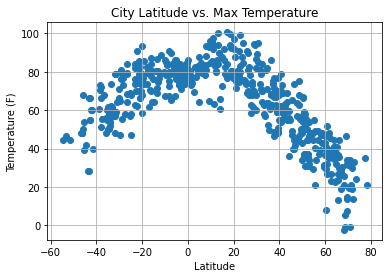

In [49]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker='o')

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../output_data/City Latitude vs Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

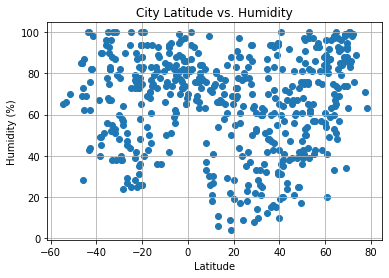

In [50]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker='o')

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/City Latitude vs Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

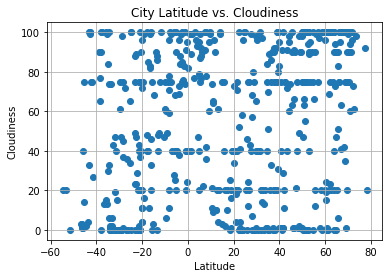

In [51]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker='o')

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../output_data/City Latitude vs Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

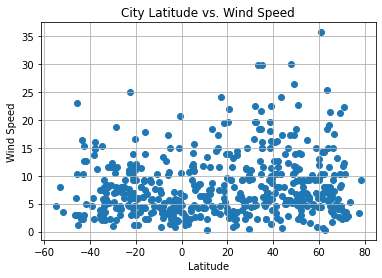

In [52]:
plt.scatter(weather_df["Lat"], weather_df["Windspeed"], marker='o')

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../output_data/City Latitude vs WindSpeed.png")
plt.show()

## Linear Regression

In [53]:
#Create hemisphere DataFrames
north_df = weather_df[weather_df['Lat']> 0]
south_df = weather_df[weather_df['Lat']<0]



In [54]:
print(f"There are {len(north_df['City'])} Northern Hemisphere citites and {len(south_df['City'])} Southern Hempisphere cities.")

There are 323 Northern Hemisphere citites and 195 Southern Hempisphere cities.


In [55]:
#Create a function to do the linear regression
def linregression(x,y,yaxis):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_value= intercept + slope*x
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x,y)
    plt.plot(x,regress_value,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    print(line_eq)
    print(f"r-squared: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.97x + 97.27
r-squared: 0.7600092516417565


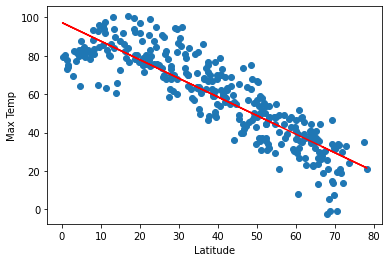

<Figure size 432x288 with 0 Axes>

In [56]:

x = north_df['Lat'].astype(float)
y = north_df['Max Temp'].astype(float)
linregression(x,y,'Max Temp')
plt.savefig("../output_data/North City Latitude vs Max Temperature.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.7x + 85.67
r-squared: 0.5429556598333455


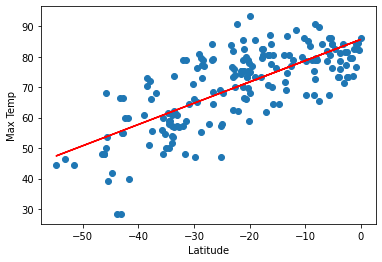

<Figure size 432x288 with 0 Axes>

In [57]:
x = south_df['Lat'].astype(float)
y = south_df['Max Temp'].astype(float)
linregression(x,y,'Max Temp')
plt.savefig("../output_data/South City Latitude vs Max Temperature.png")

In [58]:
#From this regression model we can see that northern cities have a better correlation with the temperature being highest
#near the equator. The Norhtern hemisphere follows this pattern more closely than southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.24x + 54.14
r-squared: 0.04081694156565076


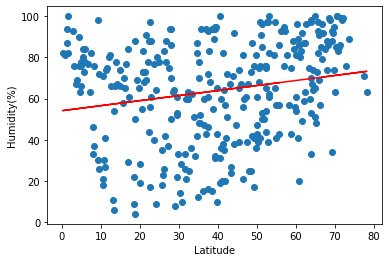

<Figure size 432x288 with 0 Axes>

In [59]:
x = north_df['Lat'].astype(float)
y = north_df['Humidity'].astype(float)
linregression(x,y,'Humidity(%)')
plt.savefig("../output_data/North City Latitude vs Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.19x + 74.74
r-squared: 0.016662180009750744


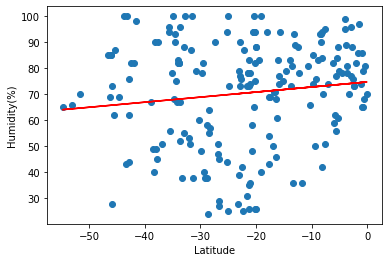

<Figure size 432x288 with 0 Axes>

In [60]:
x = south_df['Lat'].astype(float)
y = south_df['Humidity'].astype(float)
linregression(x,y,'Humidity(%)')
plt.savefig("../output_data/South City Latitude vs Humidity.png")

In [61]:
#We can see that the latitude has no correlation to humidity. This could be due to other landscape features. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.2x + 47.59
r-squared: 0.01158915651662522


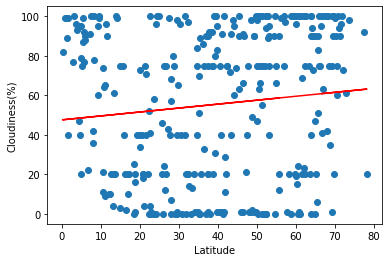

<Figure size 432x288 with 0 Axes>

In [62]:
x = north_df['Lat'].astype(float)
y = north_df['Cloudiness'].astype(float)
linregression(x,y,'Cloudiness(%)')
plt.savefig("../output_data/North City Latitude vs Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.8x + 64.47
r-squared: 0.08548320419312525


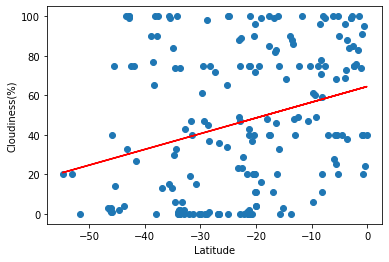

<Figure size 432x288 with 0 Axes>

In [63]:
x = south_df['Lat'].astype(float)
y = south_df['Cloudiness'].astype(float)
linregression(x,y,'Cloudiness(%)')
plt.savefig("../output_data/South City Latitude vs Cloudiness.png")

In [64]:
#Another set where the latitude does not correlated to the other variable in question. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.02x + 8.1
r-squared: 0.003397906669294586


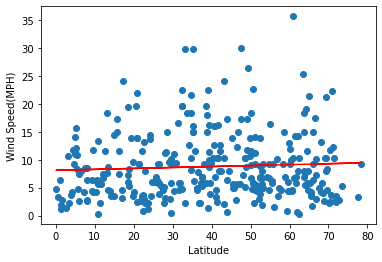

<Figure size 432x288 with 0 Axes>

In [65]:
x = north_df['Lat'].astype(float)
y = north_df['Windspeed'].astype(float)
linregression(x,y,'Wind Speed(MPH)')
plt.savefig("../output_data/North City Latitude vs WindSpeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.03x + 6.32
r-squared: 0.006850986350994469


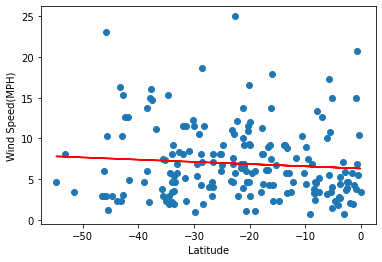

<Figure size 432x288 with 0 Axes>

In [66]:
x = south_df['Lat'].astype(float)
y = south_df['Windspeed'].astype(float)
linregression(x,y,'Wind Speed(MPH)')
plt.savefig("../output_data/South City Latitude vs WindSpeed.png")

In [67]:
#After this final data set we can see that only temperature has some correlation to latitude.